In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading Dataset
cric_base = pd.read_csv("Cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [3]:
cric_base.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
cric = cric_base[['Player','Ave','SR']]

In [5]:
cric_norm1 = cric.drop('Player', axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cric_norm1 = standard_scaler.fit_transform(cric_norm1)

In [6]:
kmeans = KMeans(n_clusters = 4, max_iter=50,random_state=100)
kmeans.fit(cric_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [7]:
cric.index = pd.RangeIndex(len(cric.index))
Cric_km = pd.concat([cric, pd.Series(kmeans.labels_)], axis=1)

In [15]:
Cric_km
Cric_km.columns = ['Player','Ave','SR','Cluster']

In [19]:
Cric_km[Cric_km['Cluster'] == 3]

,Player,Ave,SR,Cluster
0,SR Tendulkar (INDIA),44.83,86.23,3
13,MS Dhoni (Asia/INDIA),51.32,88.69,3
15,AB de Villiers (Afr/SA),53.55,100.25,3
25,V Kohli (INDIA),53.94,90.99,3
34,HM Amla (SA),50.25,89.05,3
38,MG Bevan (AUS),53.58,74.16,3
42,IVA Richards (WI),47.00,90.20,3
63,MJ Guptill (NZ),43.30,87.73,3
64,MEK Hussey (AUS),48.15,87.16,3


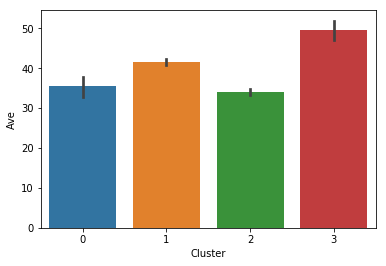

In [21]:
sns.barplot(x=Cric_km.Cluster, y=Cric_km.Ave)

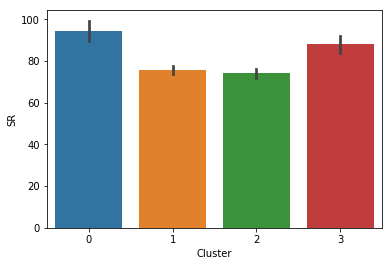

In [22]:
sns.barplot(x=Cric_km.Cluster, y=Cric_km.SR)

Cluster 3 is **high avg and high SR - A** <br>
Cluster 2 is **low avg and low SR - B** <br>
Cluster 1 is **High avg low SR - D** <br>
Cluster 0 is **High SR low Avg - C**

In [24]:
Cric_km['label'] = Cric_km['Cluster'].map({ 3:'A',2:'B',1:'D',0:'C'})
Cric_km

,Player,Ave,SR,Cluster,label
0,SR Tendulkar (INDIA),44.83,86.23,3,A
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1,D
2,RT Ponting (AUS/ICC),42.03,80.39,1,D
3,ST Jayasuriya (Asia/SL),32.36,91.20,0,C
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2,B
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1,D
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1,D
7,SC Ganguly (Asia/INDIA),41.02,73.70,1,D
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1,D
9,BC Lara (ICC/WI),40.48,79.51,1,D


In [30]:
Cric_Group = Cric_km.groupby('label')['Player'].apply(list)

In [31]:
Cric_Group

label
A    [SR Tendulkar (INDIA), MS Dhoni (Asia/INDIA), ...
B    [DPMD Jayawardene (Asia/SL), M Azharuddin (IND...
C    [ST Jayasuriya (Asia/SL), TM Dilshan (SL), AC ...
D    [KC Sangakkara (Asia/ICC/SL), RT Ponting (AUS/...
Name: Player, dtype: object